In [494]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [495]:
df = pd.read_csv("../data/all_features.csv")

In [496]:
df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Total Markdown
0,1,A,151315,1,05/02/2010,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,0.0
1,1,A,151315,1,12/02/2010,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,0.0
2,1,A,151315,1,19/02/2010,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,0.0
3,1,A,151315,1,26/02/2010,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,0.0
4,1,A,151315,1,05/03/2010,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,0.0


# Hypotheses
## h0 : There is no difference in the population u_low_fuel_prices and u_high_fuel_prices. 
## h1: There is a difference in the population u_low_fuel_prices and u_high_fuel_prices. 
p = .05 


In [497]:
df["Weekly_Sales"].mean()

np.float64(15981.25812346704)

In [498]:
# we can't have imaginary numbers to we need to get rid of negative values. 
df["Weekly_Sales"].min()

np.float64(-4988.94)

In [499]:
df[df["Weekly_Sales"] == 0.0]

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Total Markdown
6055,1,A,151315,47,11/03/2011,0.0,False,53.56,3.459,0.00,0.00,0.00,0.00,0.00,214.111056,7.742,False,0.00
6059,1,A,151315,47,12/08/2011,0.0,False,90.76,3.638,0.00,0.00,0.00,0.00,0.00,215.605788,7.962,False,0.00
6060,1,A,151315,47,19/08/2011,0.0,False,89.94,3.554,0.00,0.00,0.00,0.00,0.00,215.669311,7.962,False,0.00
16309,2,A,202307,47,13/04/2012,0.0,False,68.08,3.891,8994.04,6573.08,20.21,4162.20,1966.38,221.148403,6.891,False,21715.91
17457,2,A,202307,60,19/03/2010,0.0,False,54.52,2.720,0.00,0.00,0.00,0.00,0.00,210.873332,8.324,False,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403340,43,C,41062,85,13/01/2012,0.0,False,43.68,3.261,894.04,209.71,32.36,0.00,1191.88,211.411571,9.653,False,2327.99
407652,44,C,39910,27,14/01/2011,0.0,False,20.60,2.903,0.00,0.00,0.00,0.00,0.00,127.300935,7.224,False,0.00
417805,45,B,118221,47,11/02/2011,0.0,True,30.30,3.239,0.00,0.00,0.00,0.00,0.00,183.701613,8.549,True,0.00
418079,45,B,118221,54,15/10/2010,0.0,False,58.61,2.868,0.00,0.00,0.00,0.00,0.00,182.810620,8.724,False,0.00


In [500]:
df["Weekly_Sales"].isna().sum()

np.int64(0)

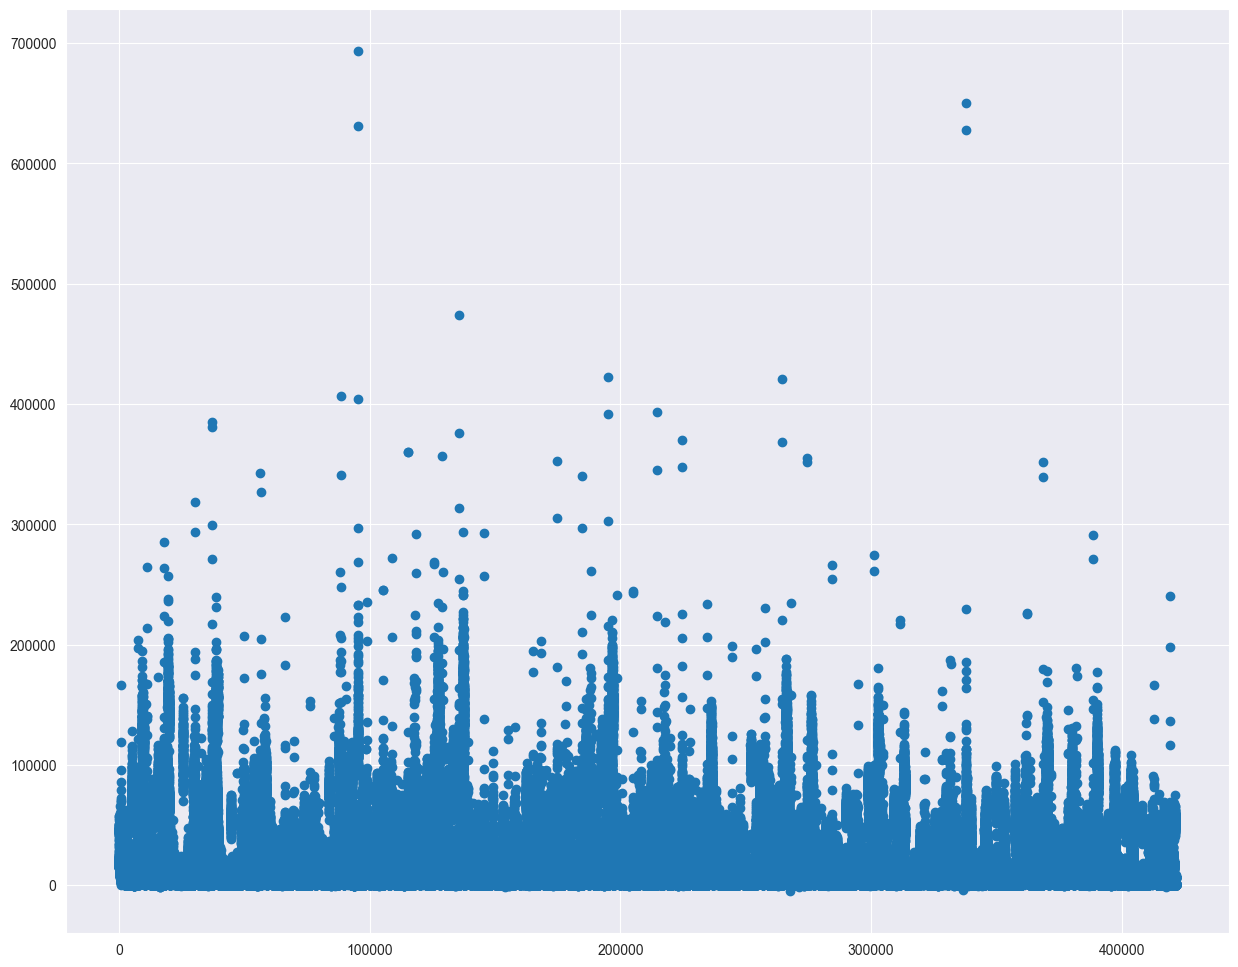

In [501]:
# outliers above 25k
ax, fig = plt.subplots(figsize=(15, 12))
plt.scatter(range(len(df)), df["Weekly_Sales"])

In [502]:
# scale data between 0, 1
df = df[(df["Weekly_Sales"] <= 30000)]

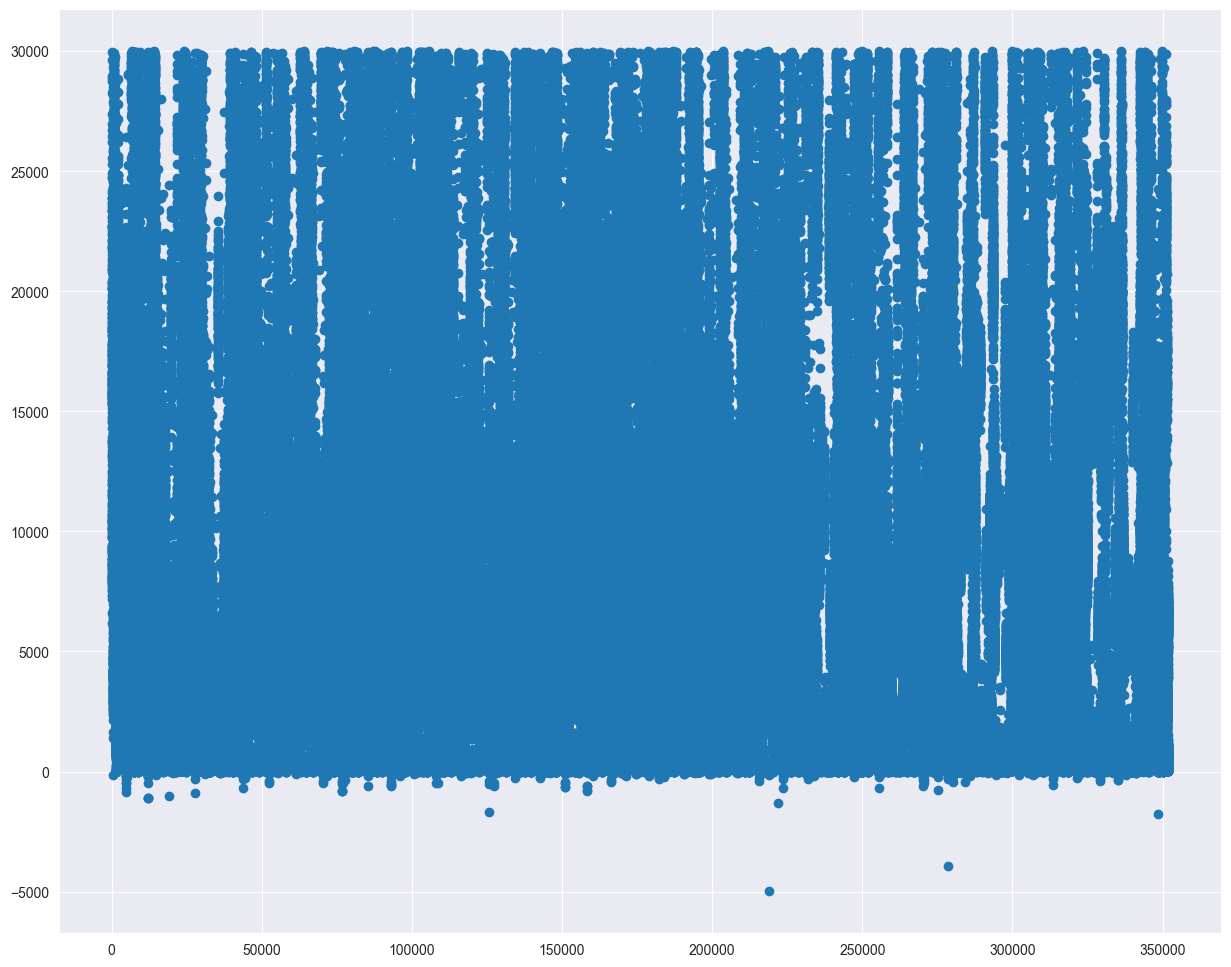

In [503]:
# outliers above 25k
ax, fig = plt.subplots(figsize=(15, 12))
plt.scatter(range(len(df)), df["Weekly_Sales"])

<Axes: ylabel='Weekly_Sales'>

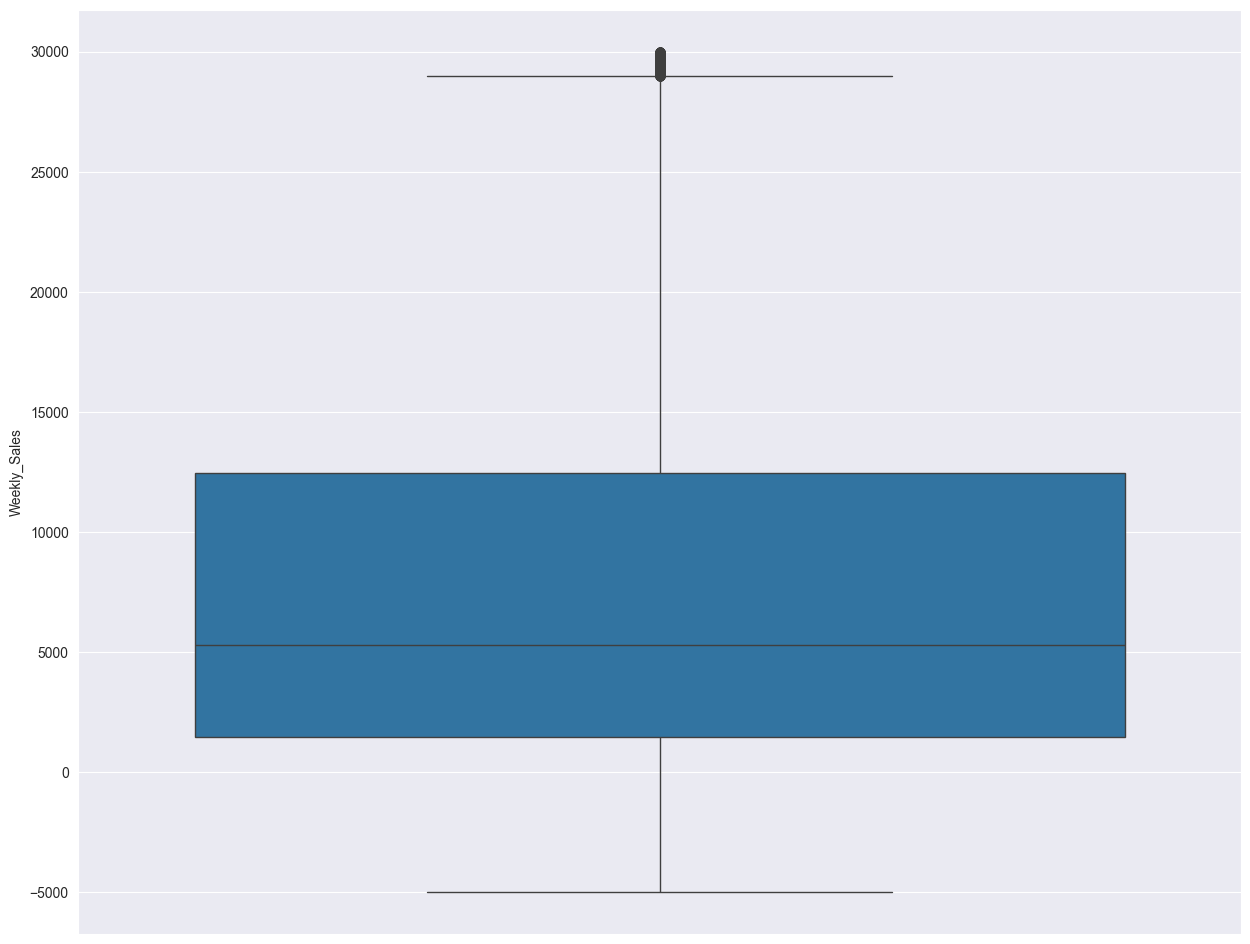

In [504]:
# looks much better
ax, fig = plt.subplots(figsize=(15, 12))
sns.boxplot(data=df["Weekly_Sales"],)

In [505]:
# because we have a large spread we can use log function to scale data. However, we have negative values so we must first 
# scale the data in the range of (1, 2)
# After this we see a muich more normal-looking distribution
minmax_scaler = MinMaxScaler(feature_range=(1, 2))#StandardScaler(with_mean=True, with_std=True) 
df["Weekly_Sales_Scaled"] = minmax_scaler.fit_transform(df["Weekly_Sales"].values.reshape(-1,1))
df["Weekly_Sales_Scaled"] = df["Weekly_Sales_Scaled"].map(lambda x: np.log(x) if x != 0 else 0)

<Axes: ylabel='Frequency'>

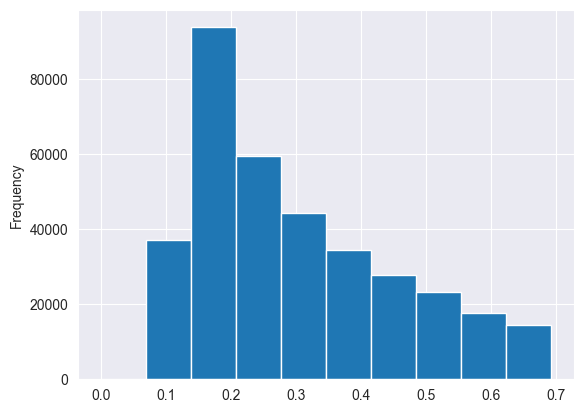

In [506]:
df["Weekly_Sales_Scaled"].plot(kind="hist")

In [507]:
# split data into two sets. One where fuel prices are higher and one where fuel prices are lower. A good cutoff could be ~3.15 
low_df = df[df["Fuel_Price"] <= 3.15] 
high_df = df[df["Fuel_Price"] > 3.15]

In [508]:
# get random samples representing about 30% of data
x_train_low = low_df["Weekly_Sales_Scaled"].sample(int(round(len(low_df) * .51))) # .51 so we can get somewhat even number of samples from each group
x_train_high = high_df["Weekly_Sales_Scaled"].sample(int(round(len(high_df) * .30)))

In [509]:
len(x_train_low) ,  len(x_train_high)

(66371, 66543)

In [510]:
len(low_df)

130139

<Axes: ylabel='Weekly_Sales_Scaled'>

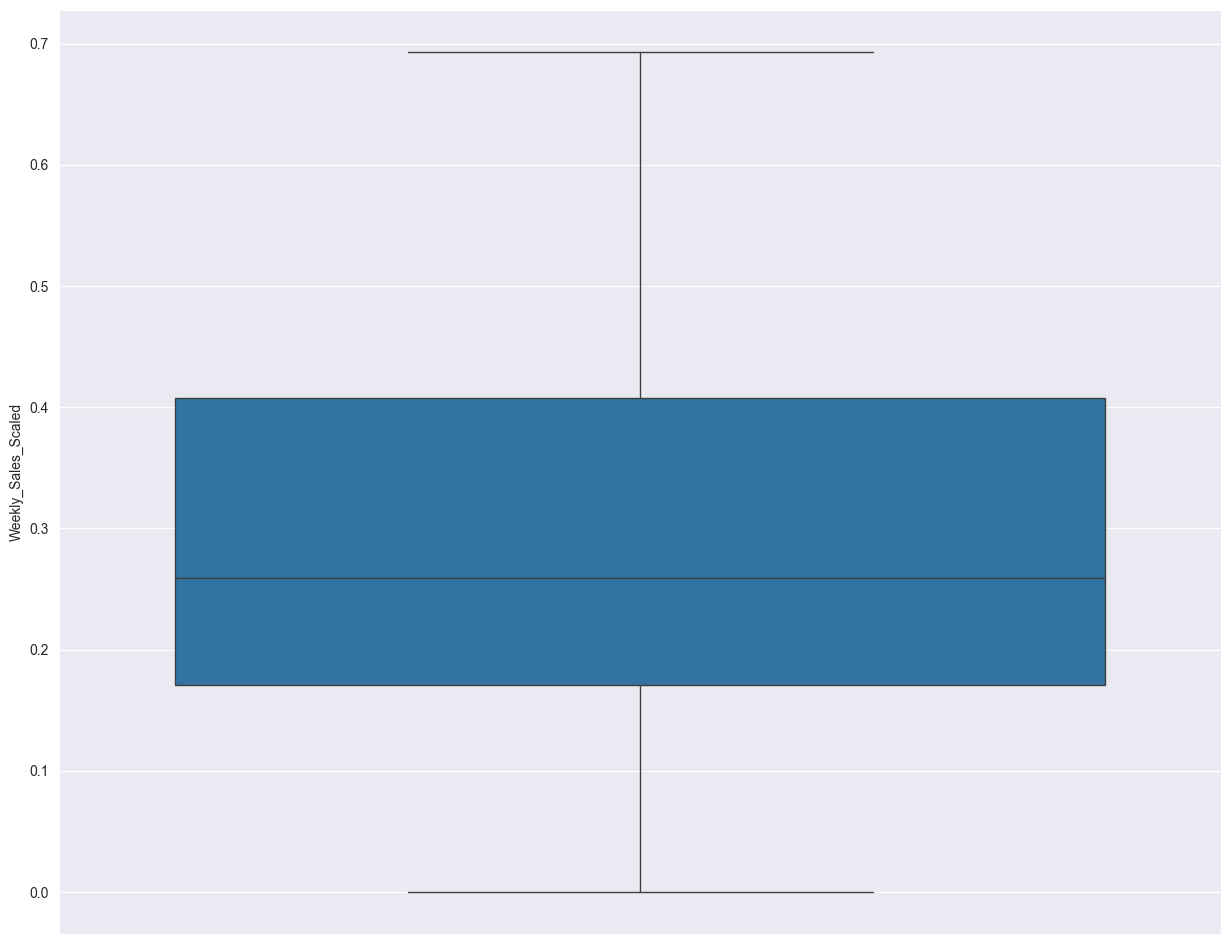

In [511]:
ax, fig = plt.subplots(figsize=(15, 12))
sns.boxplot(data=low_df["Weekly_Sales_Scaled"],)

<Axes: ylabel='Weekly_Sales'>

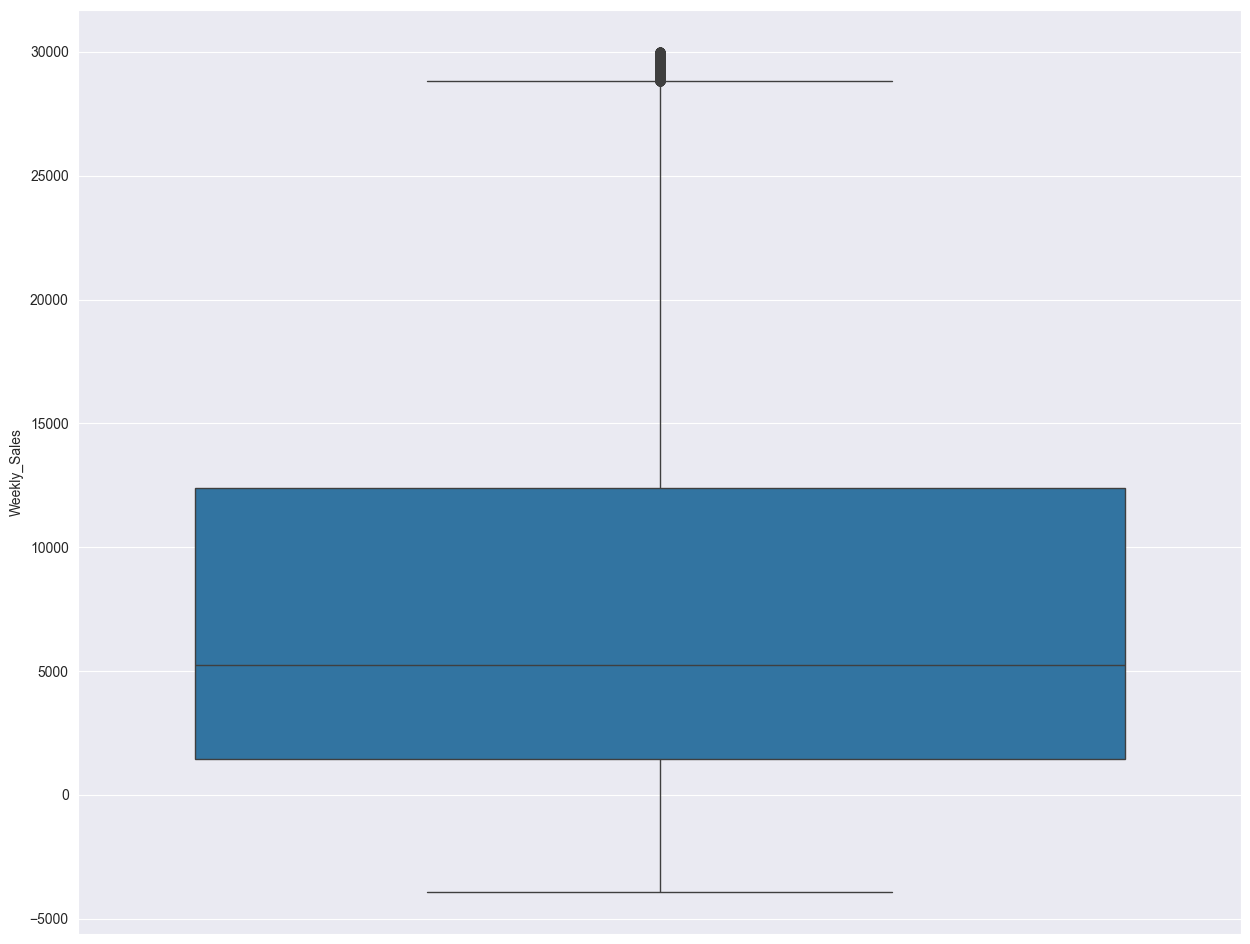

In [512]:
ax, fig = plt.subplots(figsize=(15, 12))
sns.boxplot(data=high_df["Weekly_Sales"])

In [513]:
res = stats.ttest_ind(x_train_low, x_train_high, equal_var=False)

In [514]:
res

TtestResult(statistic=np.float64(1.2073413418697192), pvalue=np.float64(0.2273028640349957), df=np.float64(132911.96197224557))

# Hypotheses
## h0 : There is no difference between the population of u_low_unemployment and u_high_unemployment. 
## h1: There is a differences between the population of u_low_unemployment and u_high_unemployment. 
p = .05 


In [515]:
# split data into two sets. One where fuel prices are higher and one where fuel prices are lower. A good cutoff could be ~8 
low_df = df[df["Unemployment"] <= 8.0] 
high_df = df[df["Unemployment"] > 8.0]

In [516]:
# get random samples representing about 30% of data
x_train_low = low_df["Weekly_Sales_Scaled"].sample(int(round(len(low_df) * .25))) # .25 so we can get somewhat even number of samples from each group
x_train_high = high_df["Weekly_Sales_Scaled"].sample(int(round(len(high_df) * .30)))

In [517]:
len(x_train_high)

48987

In [518]:
len(x_train_low)

47165

In [519]:
res = stats.ttest_ind(x_train_low, x_train_high, equal_var=False)

In [520]:
res

TtestResult(statistic=np.float64(-3.203105515794621), pvalue=np.float64(0.0013599845370659708), df=np.float64(96109.11418102641))